In [5]:
!pip install gradio pandas numpy scikit-learn matplotlib

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import gradio as gr
import pickle


In [7]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

# Rapikan nama kolom
df.columns = df.columns.str.strip()

df.head()

Saving jumlah-siswa-menurut-jenis-kelamin-dan-status-sekolah-tiap-propinsi-prov-d-k-i-jakarta-sd-2024.csv to jumlah-siswa-menurut-jenis-kelamin-dan-status-sekolah-tiap-propinsi-prov-d-k-i-jakarta-sd-2024.csv


,Kabupaten - Kota,Laki-laki (L) - Negeri,Laki-laki (L) - Swasta,Laki-laki (L) - Subjml,Perempuan (P) - Negeri,Perempuan (P) - Swasta,Perempuan (P) - Subjml,Laki-laki dan Perempuan - Negeri,Laki-laki dan Perempuan - Swasta,Laki-laki dan Perempuan - Jumlah
0,Kab. Kepulauan Seribu,1287,0,1287,1298,0,1298,2585,0,2585
1,Kota Jakarta Pusat,27942,8897,36839,26831,8429,35260,54773,17326,72099
2,Kota Jakarta Utara,36946,25492,62438,33964,24160,58124,70910,49652,120562
3,Kota Jakarta Barat,60429,26582,87011,56958,24930,81888,117387,51512,168899
4,Kota Jakarta Selatan,56652,21066,77718,53317,20077,73394,109969,41143,151112


In [8]:
df = pd.read_csv(list(uploaded.keys())[0])

# Rapikan nama kolom
df.columns = df.columns.str.strip()

# Hapus duplikasi
df = df.drop_duplicates()

# Cek missing value
print(df.isnull().sum())

# Buat kolom Total jika belum ada
df["Total"] = df["Laki-laki dan Perempuan - Jumlah"]
df.head()

Kabupaten - Kota                    0
Laki-laki (L) - Negeri              0
Laki-laki (L) - Swasta              0
Laki-laki (L) - Subjml              0
Perempuan (P) - Negeri              0
Perempuan (P) - Swasta              0
Perempuan (P) - Subjml              0
Laki-laki dan Perempuan - Negeri    0
Laki-laki dan Perempuan - Swasta    0
Laki-laki dan Perempuan - Jumlah    0
dtype: int64


,Kabupaten - Kota,Laki-laki (L) - Negeri,Laki-laki (L) - Swasta,Laki-laki (L) - Subjml,Perempuan (P) - Negeri,Perempuan (P) - Swasta,Perempuan (P) - Subjml,Laki-laki dan Perempuan - Negeri,Laki-laki dan Perempuan - Swasta,Laki-laki dan Perempuan - Jumlah,Total
0,Kab. Kepulauan Seribu,1287,0,1287,1298,0,1298,2585,0,2585,2585
1,Kota Jakarta Pusat,27942,8897,36839,26831,8429,35260,54773,17326,72099,72099
2,Kota Jakarta Utara,36946,25492,62438,33964,24160,58124,70910,49652,120562,120562
3,Kota Jakarta Barat,60429,26582,87011,56958,24930,81888,117387,51512,168899,168899
4,Kota Jakarta Selatan,56652,21066,77718,53317,20077,73394,109969,41143,151112,151112


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Kabupaten - Kota                  6 non-null      object
 1   Laki-laki (L) - Negeri            6 non-null      int64 
 2   Laki-laki (L) - Swasta            6 non-null      int64 
 3   Laki-laki (L) - Subjml            6 non-null      int64 
 4   Perempuan (P) - Negeri            6 non-null      int64 
 5   Perempuan (P) - Swasta            6 non-null      int64 
 6   Perempuan (P) - Subjml            6 non-null      int64 
 7   Laki-laki dan Perempuan - Negeri  6 non-null      int64 
 8   Laki-laki dan Perempuan - Swasta  6 non-null      int64 
 9   Laki-laki dan Perempuan - Jumlah  6 non-null      int64 
 10  Total                             6 non-null      int64 
dtypes: int64(10), object(1)
memory usage: 660.0+ bytes
None
       Laki-laki (L) - Negeri  L

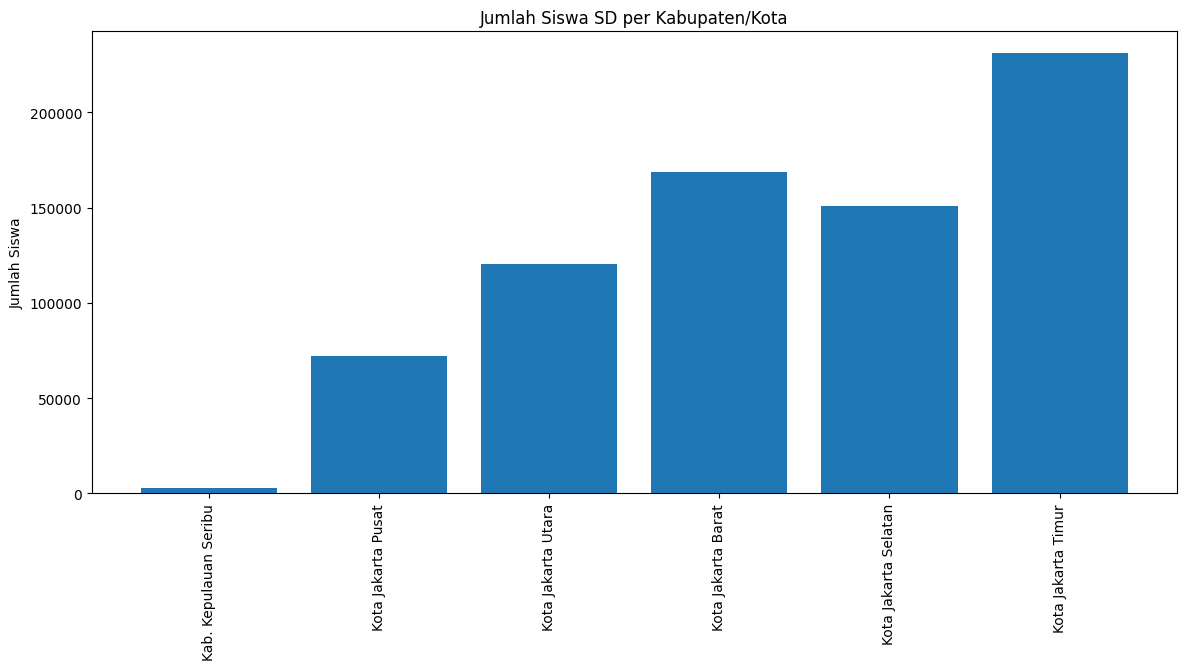

In [9]:
print(df.info())
print(df.describe())

plt.figure(figsize=(14,6))
plt.bar(df["Kabupaten - Kota"], df["Total"])
plt.xticks(rotation=90)
plt.title("Jumlah Siswa SD per Kabupaten/Kota")
plt.ylabel("Jumlah Siswa")
plt.show()

In [19]:
X = df[
    [
        "Laki-laki (L) - Negeri",
        "Laki-laki (L) - Swasta",
        "Perempuan (P) - Negeri",
        "Perempuan (P) - Swasta"
    ]
]

df["Total"] = df["Laki-laki dan Perempuan - Jumlah"]

y = df["Total"]

X.head()
y.head()


,Total
0,2585
1,72099
2,120562
3,168899
4,151112


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing :", len(X_test))

print("\nContoh X_train:")
print(X_train.head())

print("\nContoh X_test:")
print(X_test.head())

Jumlah data training: 4
Jumlah data testing : 2

Contoh X_train:
   Laki-laki (L) - Negeri  Laki-laki (L) - Swasta  Perempuan (P) - Negeri  \
5                   91845                   26983                   86615   
2                   36946                   25492                   33964   
4                   56652                   21066                   53317   
3                   60429                   26582                   56958   

   Perempuan (P) - Swasta  
5                   25519  
2                   24160  
4                   20077  
3                   24930  

Contoh X_test:
   Laki-laki (L) - Negeri  Laki-laki (L) - Swasta  Perempuan (P) - Negeri  \
0                    1287                       0                    1298   
1                   27942                    8897                   26831   

   Perempuan (P) - Swasta  
0                       0  
1                    8429  


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE : 45.66143961909552
RMSE: 48.96141585253583
R² Score: 0.9999980156267295


In [14]:
with open("model_siswa.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model tersimpan sebagai model_siswa.pkl")
files.download("model_siswa.pkl")

Model tersimpan sebagai model_siswa.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import gradio as gr
import pickle
import numpy as np

def prediksi_siswa(ln, ls, pn, ps):
    data = np.array([[ln, ls, pn, ps]])
    hasil = model.predict(data)[0]
    return round(hasil)

with open("model_siswa.pkl", "rb") as f:
    model = pickle.load(f)

def prediksi(negeri_l, negeri_p):
    data = np.array([[negeri_l, negeri_p]])
    return model.predict(data)[0]

iface = gr.Interface(
    fn=prediksi,
    inputs=[
        gr.Number(label="Jumlah Laki-Laki Negeri"),
        gr.Number(label="Jumlah Perempuan Negeri"),
        gr.Number(label="Jumlah Laki-Laki Swasta"),
        gr.Number(label="Jumlah Perempuan Swasta"),
    ],
    outputs="number",
    title="Prediksi Jumlah Siswa"
)

iface.launch()

/usr/local/lib/python3.12/dist-packages/gradio/utils.py:1052: UserWarning: Expected 2 arguments for function <function prediksi at 0x79add33645e0>, received 4.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/gradio/utils.py:1060: UserWarning: Expected maximum 2 arguments for function <function prediksi at 0x79add33645e0>, received 4.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://67b0c077caaf222f3e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [16]:
%%writefile app.py
import numpy as np
import pickle
import gradio as gr

model = pickle.load(open("model_siswa.pkl", "rb"))

def prediksi_siswa(ln, ls, pn, ps):
    data = np.array([[ln, ls, pn, ps]])
    hasil = model.predict(data)[0]
    return round(hasil)

with gr.Blocks() as app:
    gr.Markdown("# Prediksi Jumlah Siswa SD")
    ln = gr.Number(label="Laki-laki Negeri")
    ls = gr.Number(label="Laki-laki Swasta")
    pn = gr.Number(label="Perempuan Negeri")
    ps = gr.Number(label="Perempuan Swasta")
    output = gr.Number(label="Total Siswa")

    tombol = gr.Button("Prediksi")
    tombol.click(prediksi_siswa, [ln, ls, pn, ps], output)

app.launch()

Writing app.py


In [17]:
import os
os.listdir()

['.config',
 'model_siswa.pkl',
 '.gradio',
 'jumlah-siswa-menurut-jenis-kelamin-dan-status-sekolah-tiap-propinsi-prov-d-k-i-jakarta-sd-2024.csv',
 'app.py',
 'sample_data']

In [18]:
from google.colab import files
files.download("datasiswa.ipynb")

FileNotFoundError: Cannot find file: datasiswa.ipynb